Mean Squared Error: 0.14491641595906085


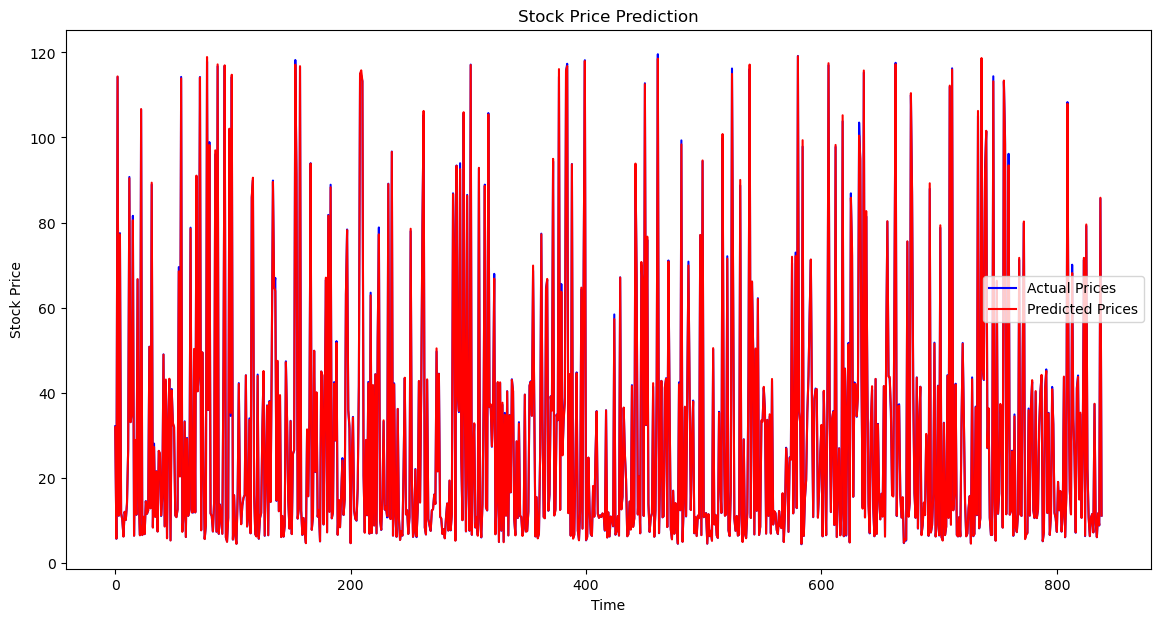

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv('D:/FWD/EW-MAX.csv')

# Feature Engineering
data['Moving_Avg_50'] = data['Close'].rolling(window=50).mean()
data['Moving_Avg_200'] = data['Close'].rolling(window=200).mean()
data = data.dropna()

# Data Preparation
X = data[['Open', 'High', 'Low', 'Volume', 'Moving_Avg_50', 'Moving_Avg_200']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting the results
plt.figure(figsize=(14, 7))

plt.plot(y_test.values, label='Actual Prices', color='b')
plt.plot(y_pred, label='Predicted Prices', color='r')

plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

plt.show()